## Template Matching

##### Simplest form of object detection

The basic drawback of template matching is it required exact image that we are looking for. Hence, it defeats the purpose of general object detection 

It uses some sort of simple correlations for match a of provided sample in a larger Image. 

In [45]:
import cv2
import matplotlib.pyplot as plt

##### Read full Image

In [46]:
full = cv2.imread('data/sammy.jpg')
full = cv2.cvtColor(full,cv2.COLOR_BGR2RGB) ## Color correction for matplotlib plot

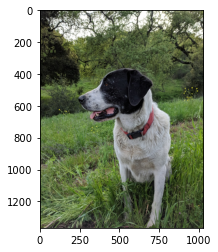

In [47]:
plt.imshow(full)

##### Read Template Image

In [48]:
face = cv2.imread('data/sammy_face.jpg')
face = cv2.cvtColor(face,cv2.COLOR_BGR2RGB)

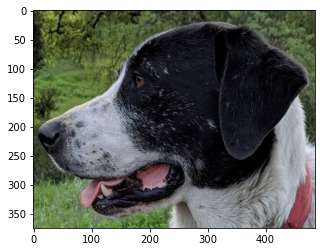

In [49]:
plt.imshow(face)

#### Introduction of eval function

In [50]:
## example 1
expre = "print(55)"
eval(expre)

55


In [51]:
## example 2
mystring = "sum"
myfunc   = eval(mystring) 

In [52]:
myfunc([1,2,3,4,5,6])

21

#### Template matching main program

In [53]:
# All the 6 methods for comparison in a list
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR',
            'cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']

In [54]:
match_ = cv2.matchTemplate(full,face,eval(methods[0])) ## It is a histogram kind of correlation match, showing the highest matching.

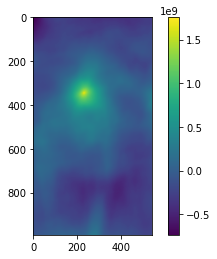

In [55]:
p = plt.imshow(match_)
plt.colorbar(p)

#### Using Multiple methods

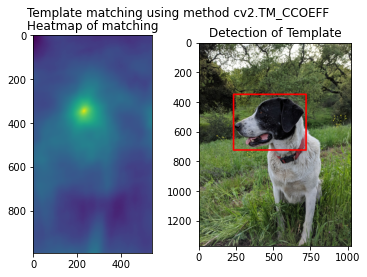

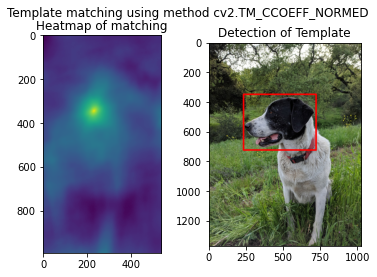

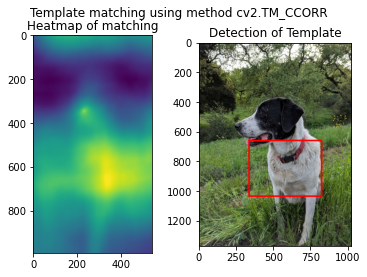

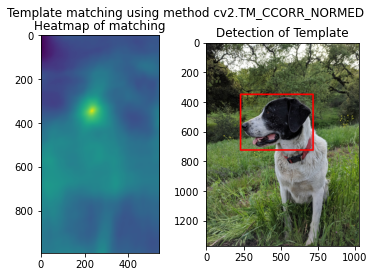

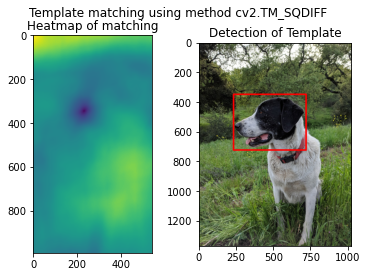

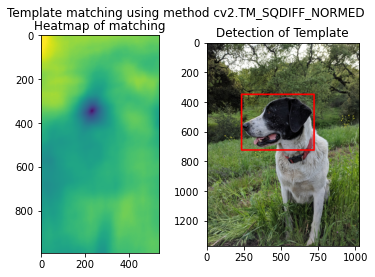

In [60]:
for m in methods:
    full_copy = full.copy() ## This line is important because draw rectangle actually changes the image value. 
                            ## So, do not work on the raw image. First create a copy and then work on it.
    match_ = cv2.matchTemplate(full_copy,face,eval(m))
    ## Objective is put a ractangle square around the match. Needs to find the max (min in case of 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED') 
    ## match location and draw a rectangle of size of the template

    ##### Find min, max value and its location in a image
    min_val,max_val,min_loc,max_loc = cv2.minMaxLoc(match_)

    if m in ['cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']:
        top_left = min_loc
    else:
        top_left = max_loc

    height,width,channel = face.shape

    plt.subplot(121)
    plt.imshow(match_)
    plt.title('Heatmap of matching')

    plt.subplot(122)
    plt.imshow(cv2.rectangle(full_copy,pt1=top_left,pt2=(top_left[0]+width,top_left[1]+height),color=(255,0,0),thickness=10))
    plt.title('Detection of Template')
    plt.suptitle(f'Template matching using method {m}')

    plt.show() 